## 1. Giới thiệu dataset

- Đây là tập dữ liệu BankChurners — một bộ dữ liệu giao dịch và thông tin khách hàng của ngân hàng.

- Mỗi dòng tương ứng với một khách hàng, đi kèm nhiều đặc trưng mô tả hành vi sử dụng thẻ tín dụng.

- Dataset được dùng để phân tích và dự đoán khả năng rời bỏ dịch vụ (churn) của khách hàng.


## 2. Khám phá dữ liệu



In [1]:
# 01. Import thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Thêm đường dẫn src để import module
sys.path.append(os.path.abspath(".."))
from src.data_processing import *
from src.visualization import *

# Thiết lập hiển thị đồ họa
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# 02. Load dữ liệu và xác định cột số

file_path = "../data/raw/BankChurners.csv"

header, data_raw = load_csv(file_path)
print("Số dòng dữ liệu:", len(data_raw))
print("Số cột:", len(header))

# Lọc các cột dữ liệu là số
numeric_idx, numeric_cols = detect_numeric_columns(data_raw, header)
data = convert_data(data_raw, numeric_idx)
num_data = convert_data(data_raw, numeric_idx)
print("Các cột số:", numeric_cols)

Số dòng dữ liệu: 10127
Số cột: 23
Các cột số: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education']


In [3]:
# 03. Thống kê mô tả cho các cột có dữ liệu là số
mean, median, std, min_val, max_val = compute_statistics(num_data)

print(f"{'Feature':30s} {'Mean':>15s} {'Median':>15s} {'Std':>15s} {'Min':>15s} {'Max':>15s}")
print("-"*110)

for i, col in enumerate(numeric_cols):
    print(f"{col[:25]:30s} {mean[i]:15.2f} {median[i]:15.2f} {std[i]:15.2f} {min_val[i]:15.2f} {max_val[i]:15.2f}")


Feature                                   Mean          Median             Std             Min             Max
--------------------------------------------------------------------------------------------------------------
CLIENTNUM                         739177606.33    717926358.00     36901961.36    708082083.00    828343083.00
Customer_Age                             46.33           46.00            8.02           26.00           73.00
Dependent_count                           2.35            2.00            1.30            0.00            5.00
Months_on_book                           35.93           36.00            7.99           13.00           56.00
Total_Relationship_Count                  3.81            4.00            1.55            1.00            6.00
Months_Inactive_12_mon                    2.34            2.00            1.01            0.00            6.00
Contacts_Count_12_mon                     2.46            2.00            1.11            0.00            6.00
C

### Nhận xét tổng quát về thống kê mô tả:

- Customer_Age: Tuổi khách hàng trung bình khoảng 46, phần lớn khách hàng thuộc nhóm trung niên.

- Months_on_book: Khách hàng đã gắn bó với ngân hàng trung bình khoảng 36 tháng, tương đối lâu.

- Total_Relationship_Count: Khách hàng sử dụng trung bình 3–4 sản phẩm/dịch vụ.

- Credit_Limit: Hạn mức tín dụng lệch phải; giá trị trung bình ~8.632 nhưng median chỉ ~4.549 → tồn tại một số khách hàng có hạn mức rất cao (outliers).

- Total_Trans_Amt & Total_Trans_Ct: Tổng lượng và số lần giao dịch trung bình tương đối cao (~4.400 và ~65), nhưng phân phối lệch phải, cho thấy một số khách hàng giao dịch rất nhiều.

- Avg_Utilization_Ratio: Tỷ lệ sử dụng hạn mức thẻ trung bình ~0.27 → phần lớn khách hàng không sử dụng hết hạn mức.


In [4]:
# 04. Kiểm tra missing value

missing = count_missing(num_data)

print(f"{'Feature':30s} {'Missing':>10s}")
print("-"*45)
for i, col in enumerate(numeric_cols):
    print(f"{col[:25]:30s} {missing[i]:10d}")

cat_data = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 
            'Income_Category', 'Card_Category']

missing_cat = count_missing_categorical(data_raw, header, cat_data)
print(f"\n{'Feature':30s} {'Missing':>10s}")
print("-"*45)
for col, count in missing_cat.items():
    print(f"{col[:25]:30s} {count:10d}")


Feature                           Missing
---------------------------------------------
CLIENTNUM                               0
Customer_Age                            0
Dependent_count                         0
Months_on_book                          0
Total_Relationship_Count                0
Months_Inactive_12_mon                  0
Contacts_Count_12_mon                   0
Credit_Limit                            0
Total_Revolving_Bal                     0
Avg_Open_To_Buy                         0
Total_Amt_Chng_Q4_Q1                    0
Total_Trans_Amt                         0
Total_Trans_Ct                          0
Total_Ct_Chng_Q4_Q1                     0
Avg_Utilization_Ratio                   0
Naive_Bayes_Classifier_At               0
Naive_Bayes_Classifier_At               0

Feature                           Missing
---------------------------------------------
Attrition_Flag                          0
Gender                                  0
Education_Level          

### Nhận xét: có dữ liệu bị missing (sẽ xử lí ở phần preprocess)

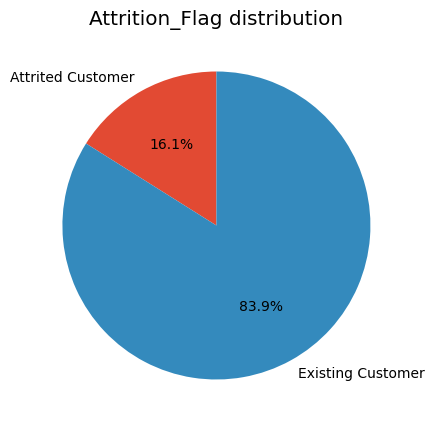

In [5]:
# 05. Phân phối Attrition_Flag
attr_flag = extract_attrition_flag(data_raw, header)
plot_attrition_distribution(attr_flag)


### Nhận xét: 

- Tỉ lệ khách hàng rời bỏ dịch vụ (Attrited Customer) chiếm khoảng 16%, nhóm còn lại (Existing Customer) chiếm 84%.

- Nhóm rời bỏ dịch vụ là thiểu số nên cần cân nhắc khi xây dựng mô hình phân loại (imbalanced).

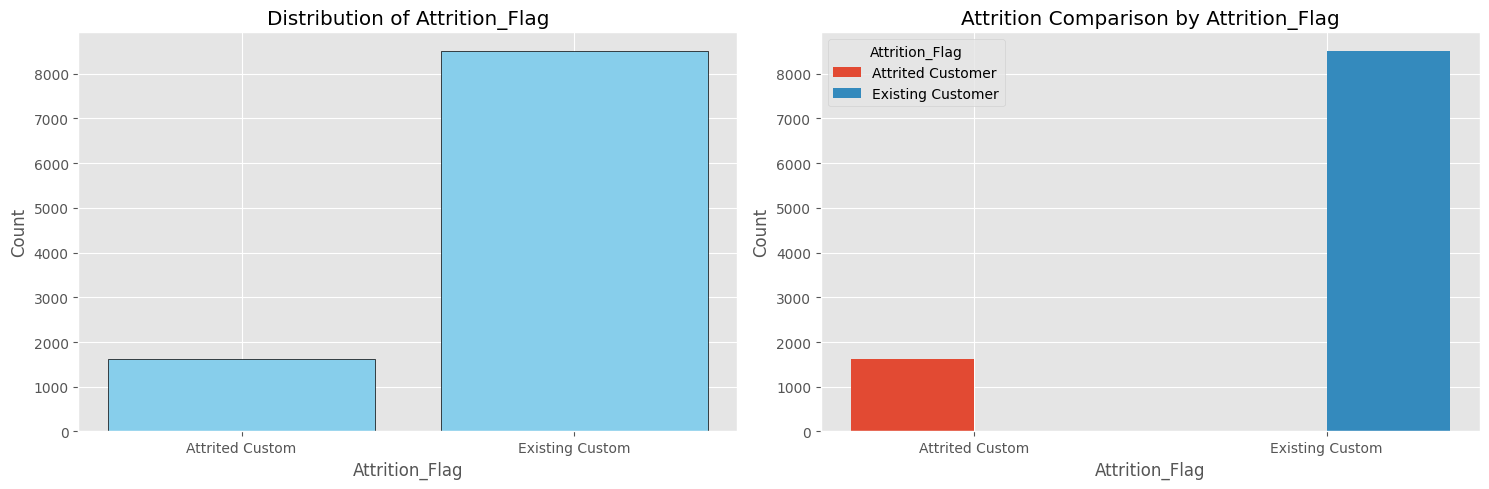

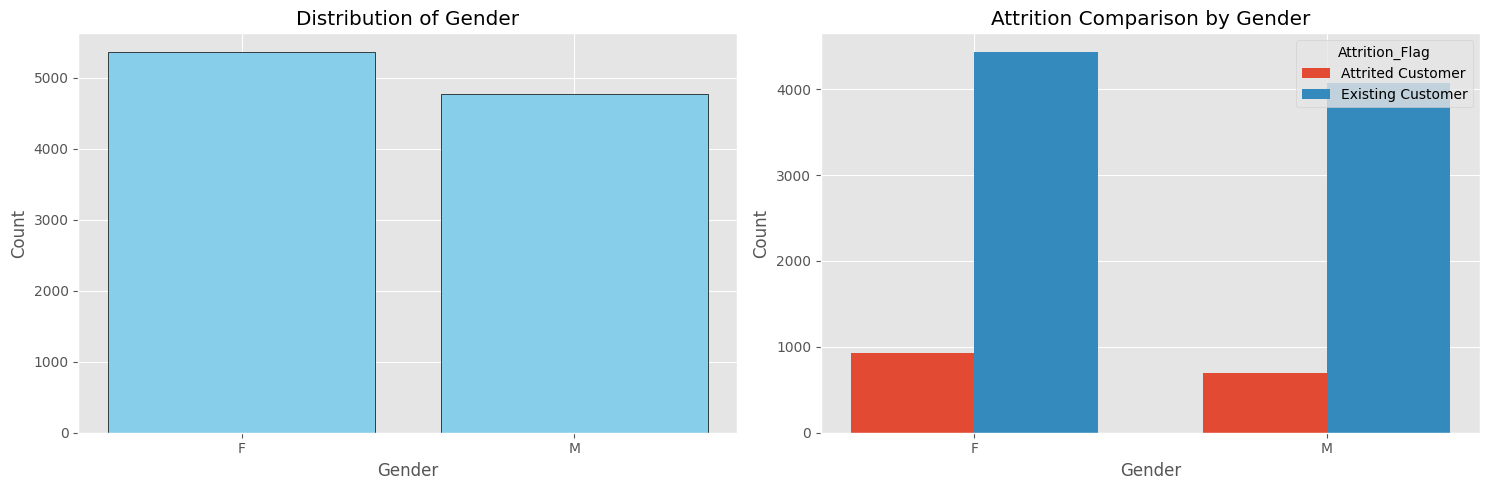

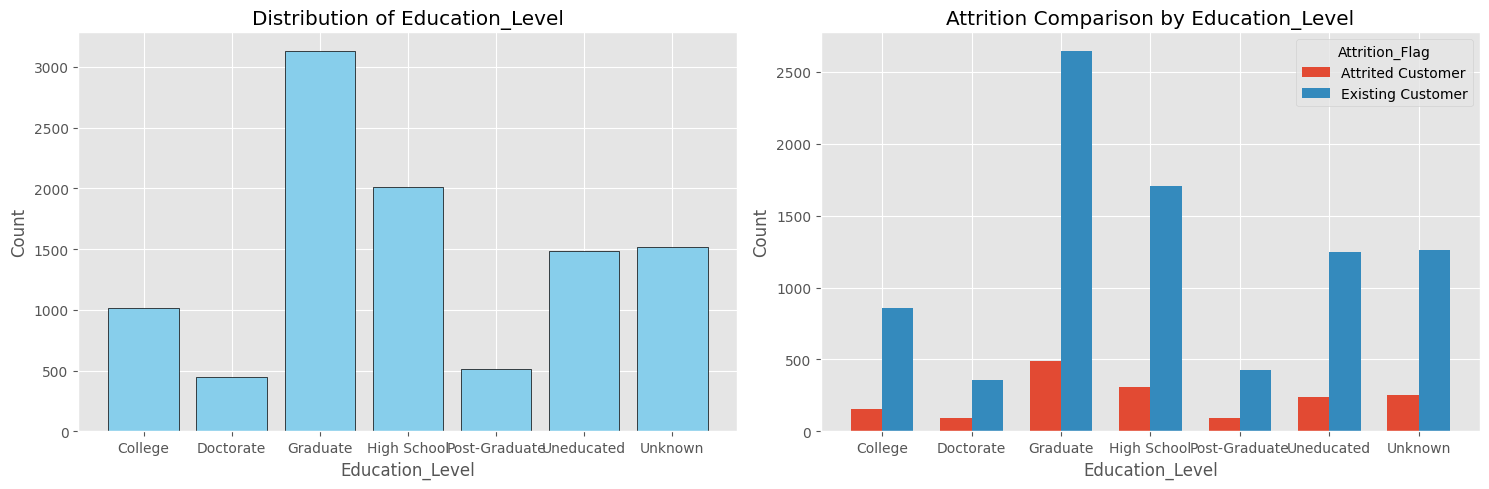

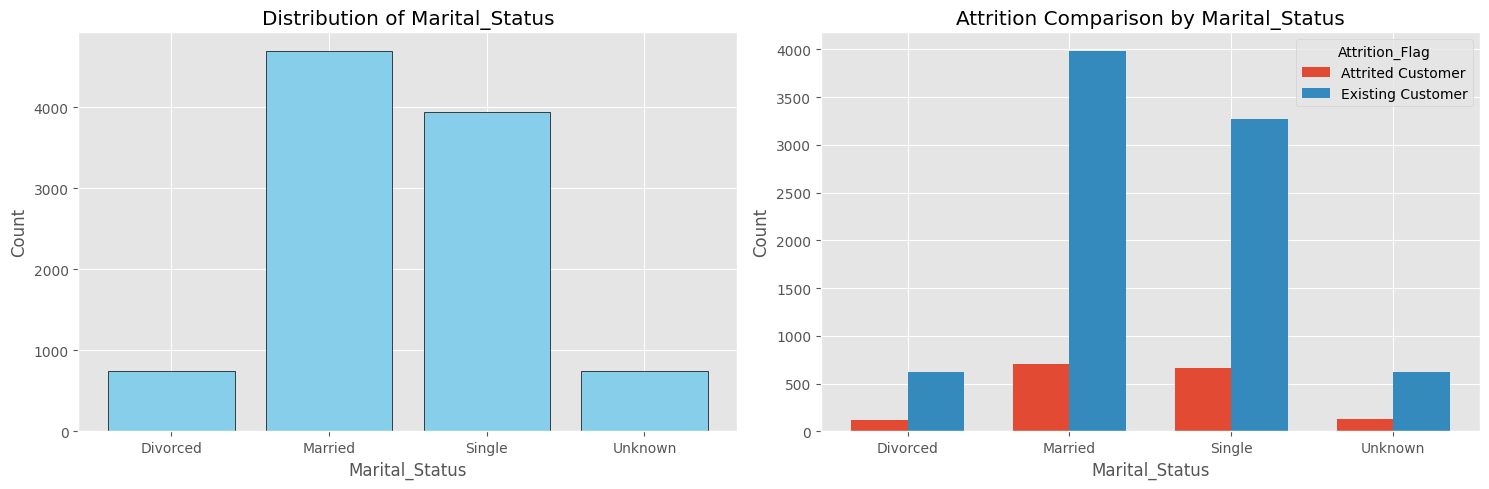

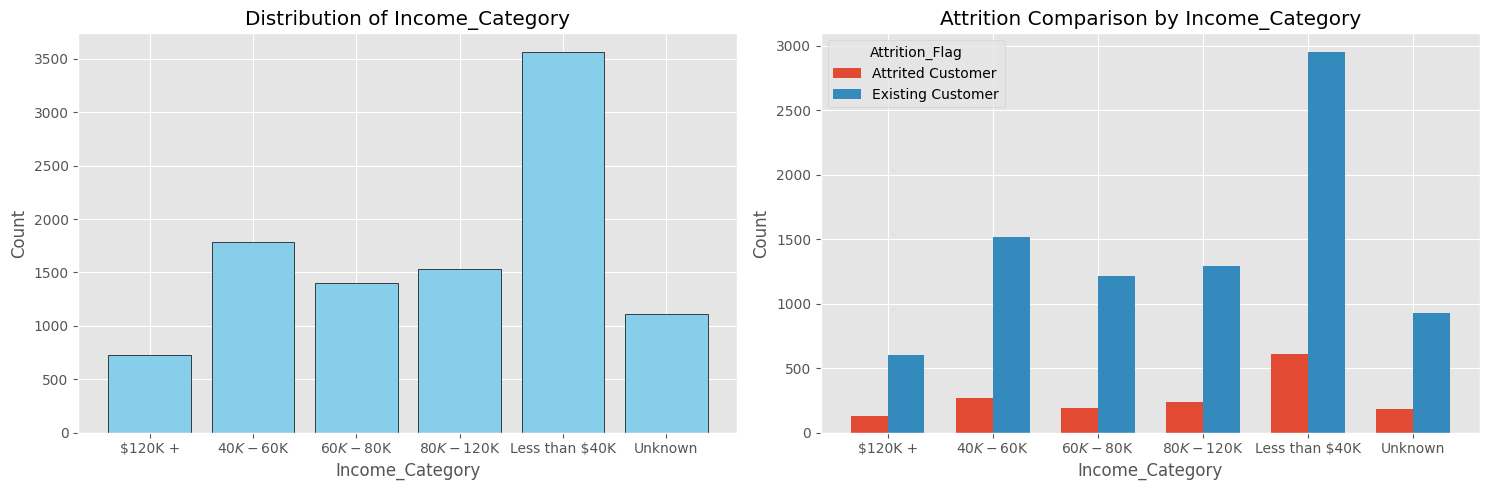

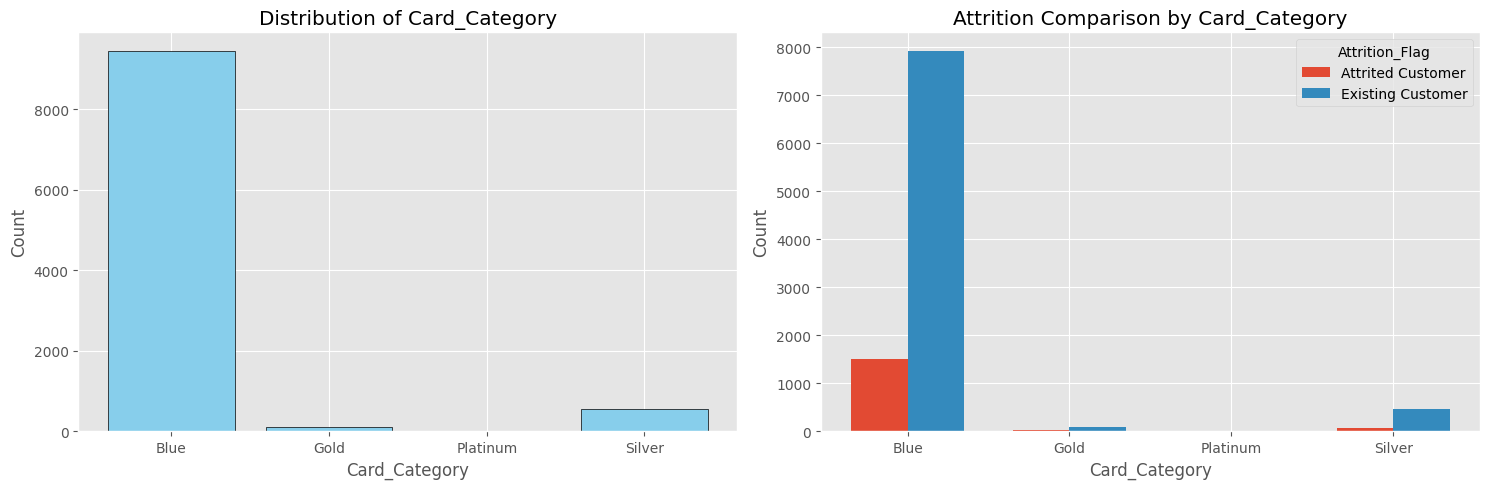

In [6]:
# 06. Phân bố các cột phân loại
plot_categorical_distribution(data_raw, header, cat_data, attr_flag, shorten=lambda x: x[:15])


### Nhận xét:

- `Gender`: Phân bố giữa nam (M) và nữ (F) tương đối cân bằng.

- `Education_Level`: Nhóm Graduate và High School chiếm đa số. 

- `Marital_Status`: Nhóm Married và Single là hai nhóm lớn nhất.

- `Income_Category`: Phân bố tập trung ở nhóm thu nhập trung bình thấp ( less than $40k ).

- `Card_Category`: Phần lớn khách hàng sử dụng loại thẻ Blue. Các loại thẻ cao cấp hơn (Silver, Gold, Platinum) chiếm tỷ lệ rất nhỏ.

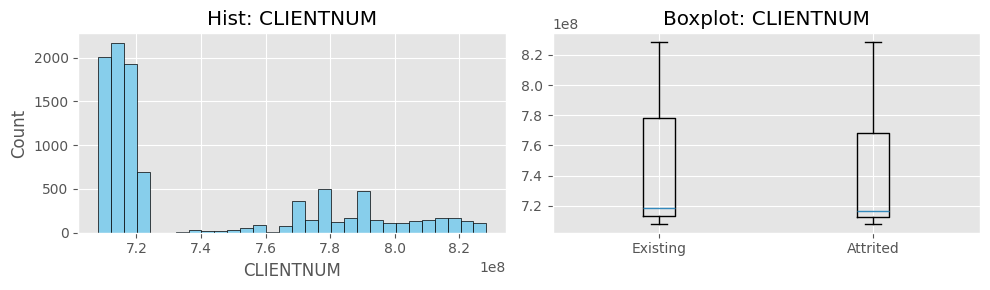

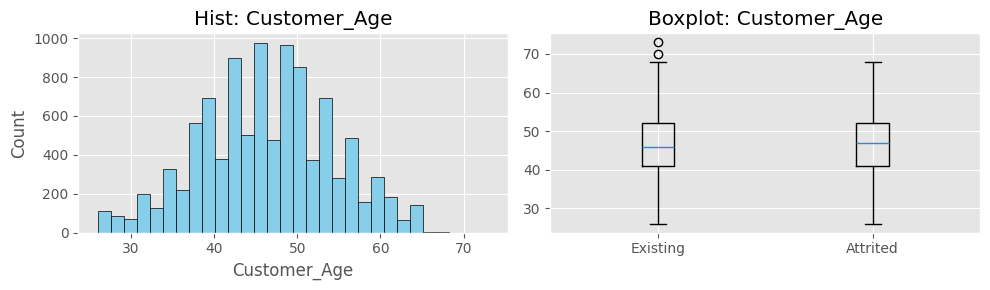

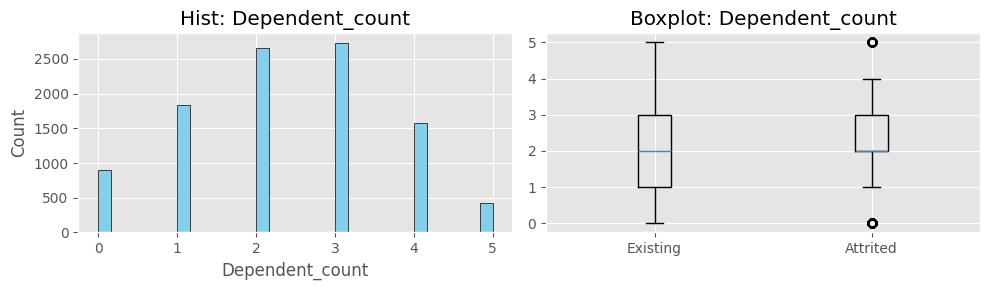

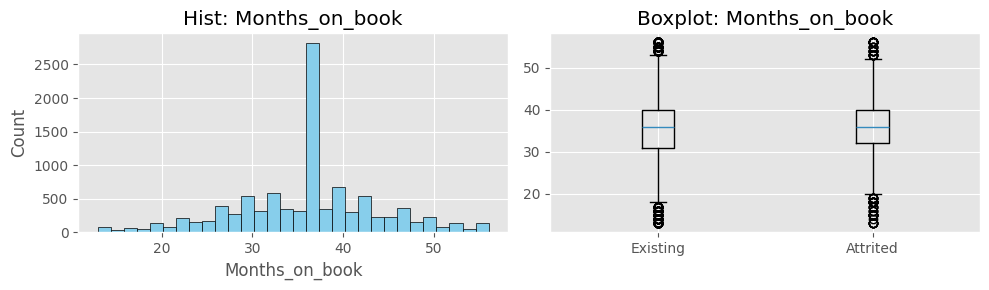

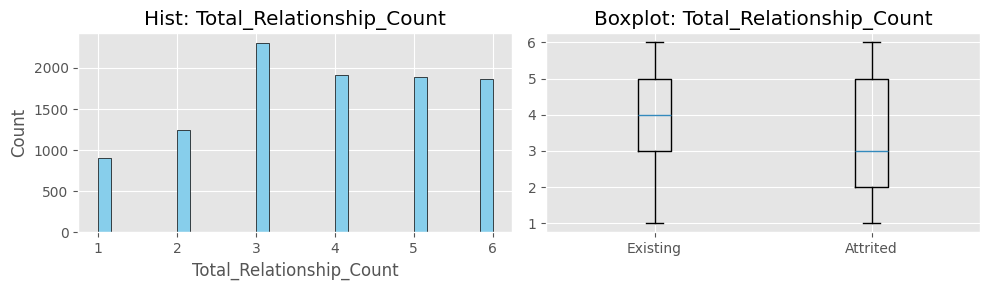

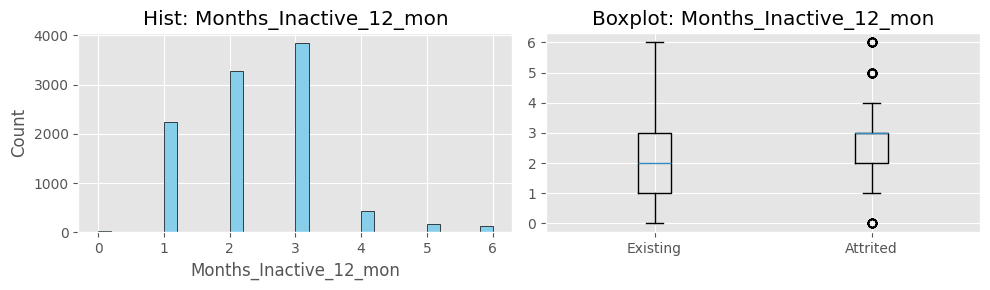

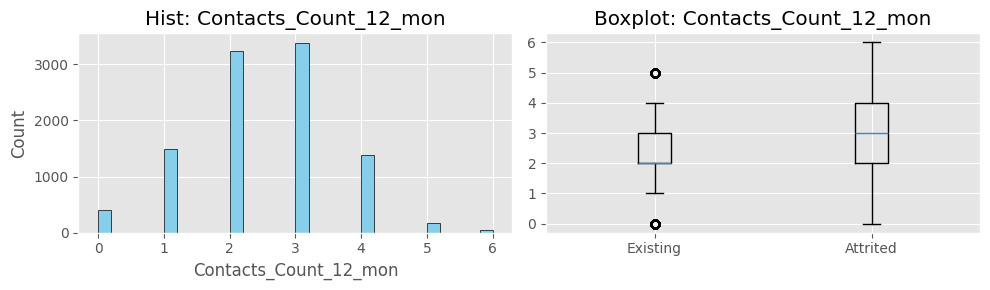

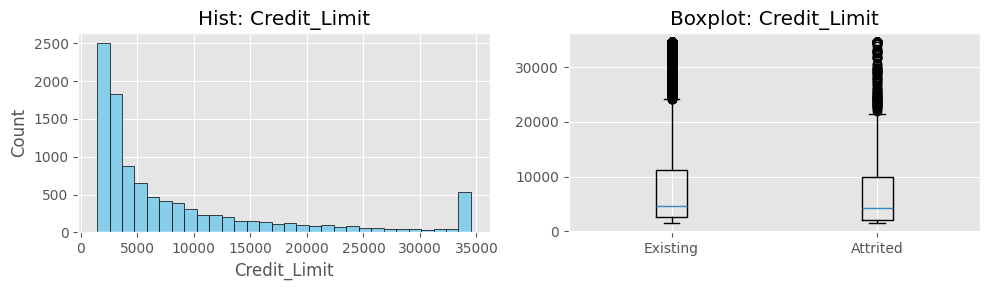

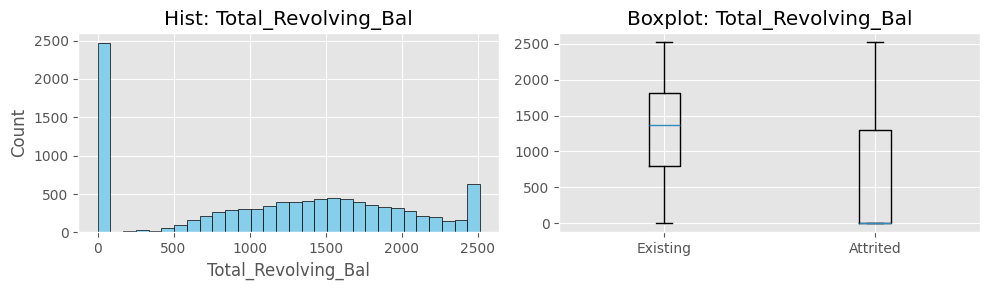

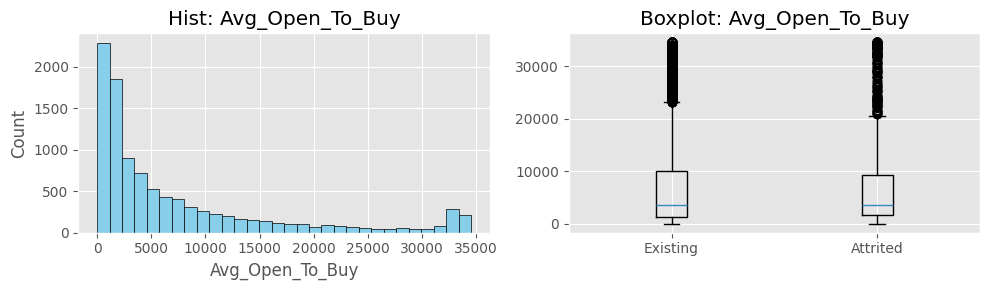

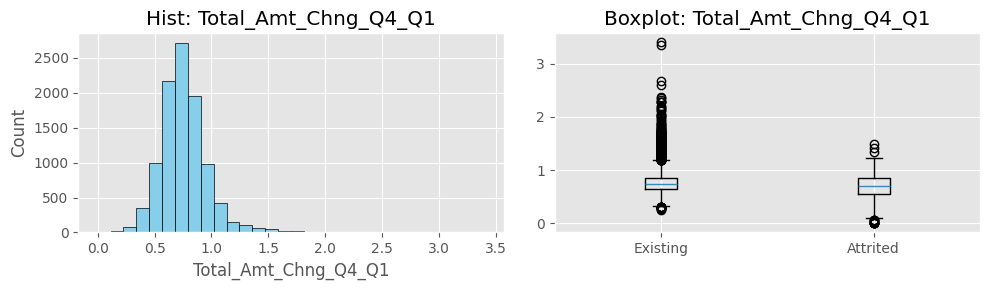

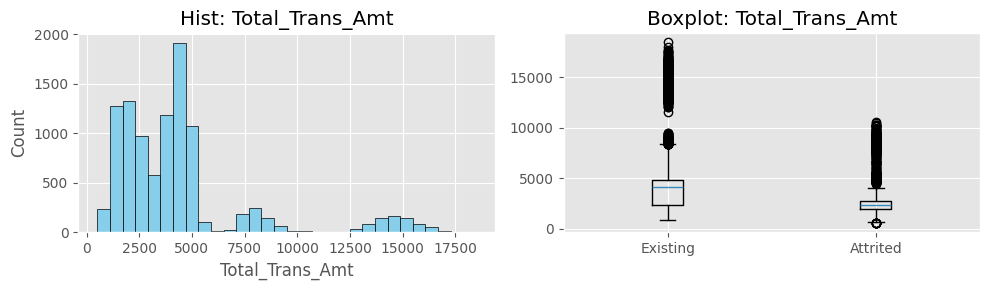

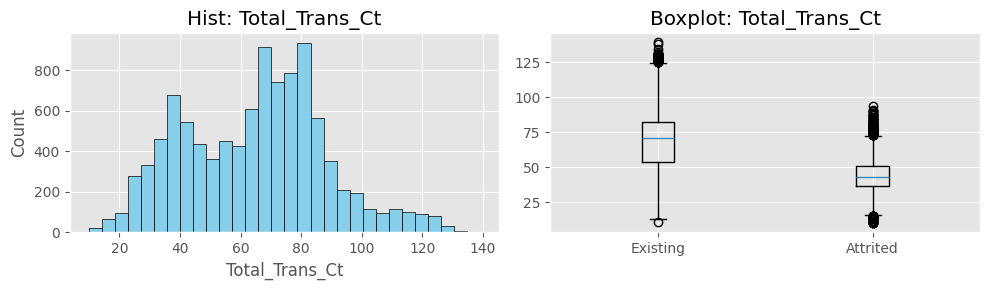

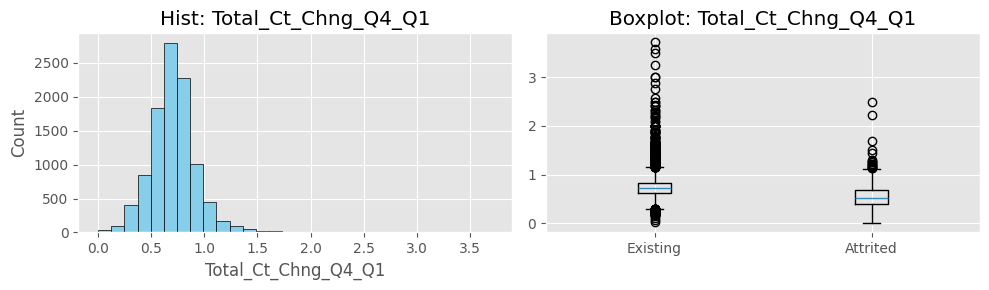

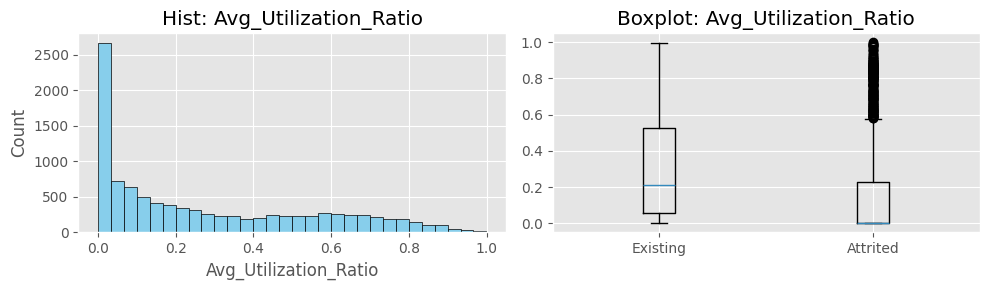

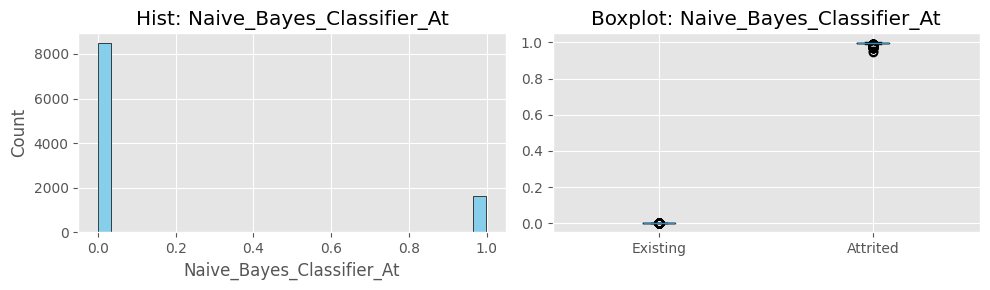

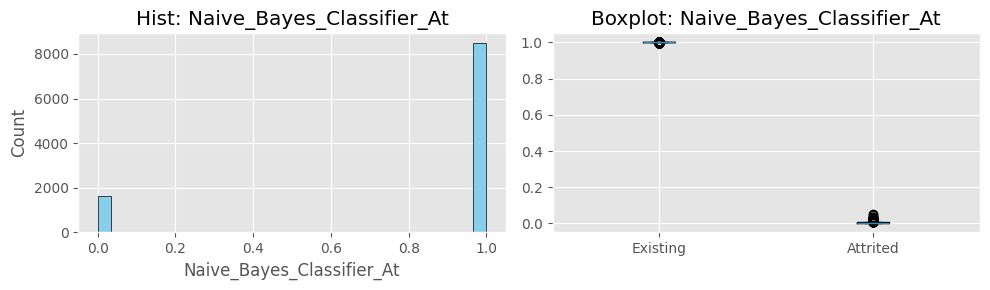

In [7]:
# 07. Phân bố các cột số
plot_numeric_distribution(num_data, numeric_cols, attr_flag, shorten_col=lambda x: x[:25])

### Nhận xét:

- Total_Trans_Amt (Tổng lượng giao dịch): Quan sát sự khác biệt rõ rệt về trung vị và phân phối. Nhóm Attrited Customer có vẻ có tổng lượng giao dịch thấp hơn đáng kể so với nhóm Existing Customer. Đây là một đặc trưng dự đoán rất mạnh.

- Total_Trans_Ct (Tổng số lần giao dịch): Tương tự như Total_Trans_Amt, số lần giao dịch của nhóm khách hàng đã rời bỏ cũng thấp hơn.

- Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức): Nhóm Attrited Customer có xu hướng có tỷ lệ sử dụng hạn mức thẻ tín dụng thấp hơn so với nhóm Existing Customer (Trung vị của nhóm gần 0 hơn).

- Credit_Limit (Hạn mức tín dụng): Có sự khác biệt về hạn mức tín dụng giữa hai nhóm, nhưng có thể không quá rõ ràng bằng các biến giao dịch. Biến này có vẻ lệch phải, cho thấy có outliers (khách hàng VIP) với hạn mức rất cao.

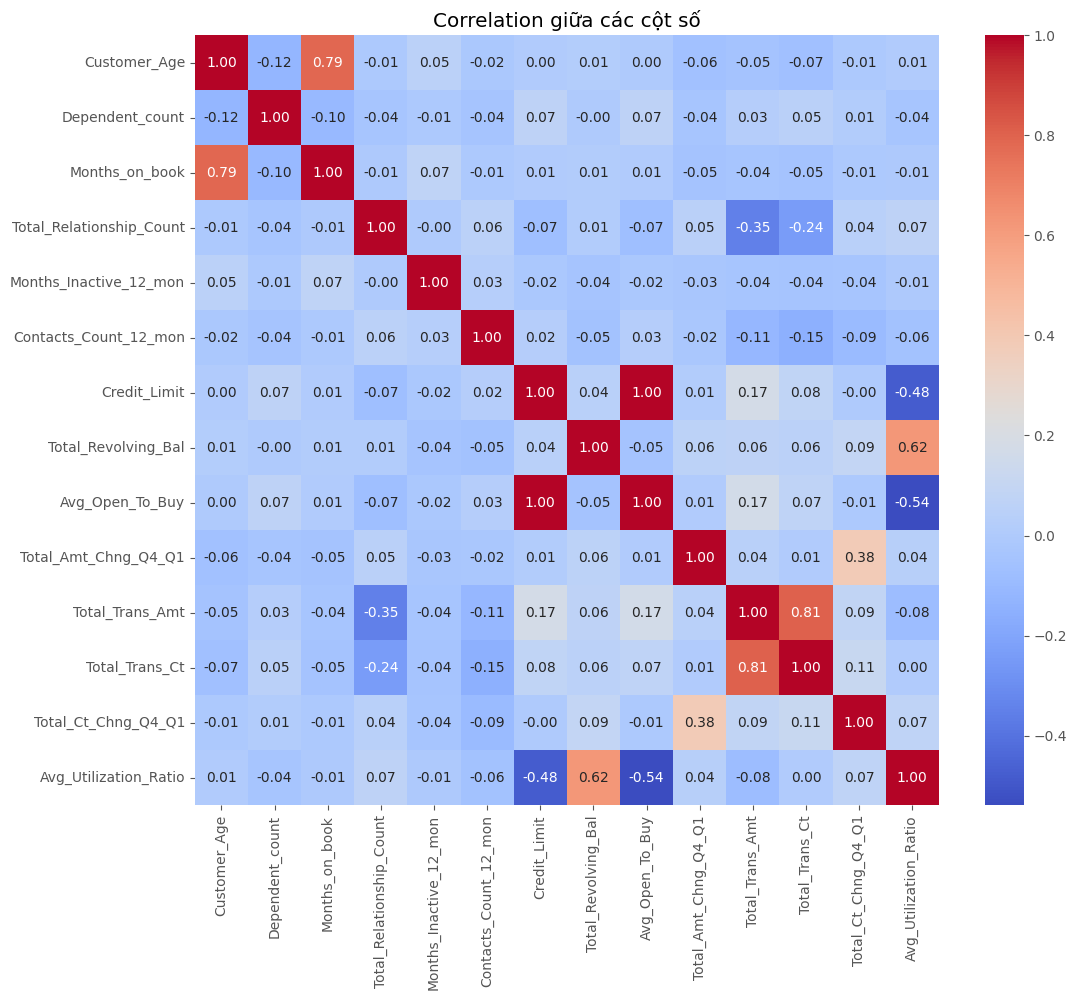

In [8]:
# 08. Correlation heatmap

num_cols_full = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

num_idx_full = [header.index(c) for c in num_cols_full]
num_data_full = data_raw[:, num_idx_full].astype(float)

# Sử dụng hàm visualization
plot_correlation_heatmap(num_data_full, num_cols_full)


### Nhận xét:

#### 1. Các biến liên quan đến giao dịch (Transaction)

- `Total_Trans_Amt` ↔ `Total_Trans_Ct`: 0.81 → tương quan rất mạnh => Khách hàng giao dịch nhiều lần thường có tổng lượng giao dịch cao.

- `Total_Trans_Amt` & `Total_Trans_Ct` ↔ `Total_Ct_Chng_Q4_Q1`: tương quan thấp (0.09–0.11) → biến thay đổi tỷ lệ giao dịch theo quý có thể cung cấp thông tin riêng biệt, không hoàn toàn trùng với tổng số hoặc tổng lượng.

#### 2. Các biến liên quan đến hạn mức tín dụng (Credit)

- `Credit_Limit` ↔ `Avg_Open_To_Buy`: 1.0 → cực kỳ tương quan, gần như trùng nhau 

Giải thích: Vì Avg_Open_To_Buy = Credit_Limit - Total_Revolving_Bal, mà Total_Revolving_Bal thường nhỏ so với Credit_Limit.

- `Credit_Limit` ↔ `Avg_Utilization_Ratio`: -0.48 → tương quan âm vừa phải.

Giải thích: Hạn mức cao hơn thường dẫn đến tỷ lệ sử dụng thấp hơn, hợp lý với hành vi sử dụng thẻ.

#### 3. Các biến liên quan đến số dư/chi tiêu

- `Total_Revolving_Bal` ↔ `Avg_Utilization_Ratio`: 0.62 → tương quan dương trung bình.

Giải thích: Khách hàng có số dư tuần hoàn cao thường có mức sử dụng hạn mức cao.

- Các biến như `Total_Amt_Chng_Q4_Q1` và `Total_Ct_Chng_Q4_Q1` có tương quan yếu với hầu hết các biến khác (<0.4) → cung cấp thông tin mới, không trùng lặp.

#### 4. Các biến liên quan đến thông tin khách hàng cá nhân

- `Customer_Age` ↔ `Months_on_book`: 0.79 → tương quan mạnh.

Giải thích: Khách hàng lớn tuổi thường đã gắn bó với ngân hàng lâu hơn.

- Các biến như `Dependent_count`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon` hầu hết có tương quan yếu (<0.1) với các biến khác → cung cấp thông tin độc lập.

#### 5. Tổng thể

- Các biến giao dịch (`Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Revolving_Bal`, `Avg_Utilization_Ratio`) có mối quan hệ tương đối phức tạp, một số mạnh, một số yếu.

- Một số biến numeric gần như trùng nhau (`Credit_Limit` và `Avg_Open_To_Buy`), cần cân nhắc khi dùng cho các mô hình tuyến tính hoặc Regularized Regression.

- Các biến thay đổi theo quý (`Total_Amt_Chng_Q4_Q1`, `Total_Ct_Chng_Q4_Q1`) có thể mang thông tin bổ sung riêng biệt vì tương quan thấp với biến khác.